# Import all necessary libraries

In [27]:
from logging import warning
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Import the built-in warnings module
import warnings

# Use warnings.filterwarnings
warnings.filterwarnings('ignore')


In [10]:
renewable_colors = ['#2E8B57', '#20B2AA', '#00CED1', '#4682B4', '#5F9EA0', '#008B8B']
sns.set_palette(renewable_colors)

In [2]:
# Load the dataset
data = pd.read_csv('/content/renewable_energy_dataset - renewable_energy_dataset.csv')

# Read and View the dataset
print(data.shape)
data.head()

(4386, 9)


,Datetime,Site,Energy_Type,Energy_Generated_MWh,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s,Day_Type,Season
0,1/1/2023 16:30,Site_A,Solar,28.86,21.57,74.61,NaN,Weekend,Winter
1,1/1/2023 9:15,Site_A,Wind,43.20,4.97,NaN,8.00,Weekend,Winter
2,1/1/2023 6:00,Site_B,Solar,66.99,25.73,20.48,NaN,Weekend,Winter
3,1/1/2023 17:45,Site_B,Wind,67.63,19.10,NaN,12.56,Weekend,Winter
4,1/1/2023 7:00,Site_C,Solar,67.94,27.57,37.11,NaN,Weekend,Winter


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Datetime              4386 non-null   object 
 1   Site                  4386 non-null   object 
 2   Energy_Type           4386 non-null   object 
 3   Energy_Generated_MWh  4386 non-null   float64
 4   Temperature_C         4386 non-null   float64
 5   Cloud_Cover_%         2193 non-null   float64
 6   Wind_Speed_m_s        2193 non-null   float64
 7   Day_Type              4386 non-null   object 
 8   Season                4386 non-null   object 
dtypes: float64(4), object(5)
memory usage: 308.5+ KB


In [4]:
data.describe()

,Energy_Generated_MWh,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s
count,4386.000000,4386.000000,2193.000000,2193.000000
mean,44.935449,19.943947,49.813133,7.962344
std,18.454875,7.986045,29.285461,2.004234
min,1.500000,-10.820000,0.020000,0.490000
25%,31.422500,14.672500,23.960000,6.650000
50%,43.105000,20.770000,48.820000,7.960000
75%,56.340000,25.617500,75.700000,9.320000
max,102.890000,41.890000,99.930000,14.210000


Datetime                   0
Site                       0
Energy_Type                0
Energy_Generated_MWh       0
Temperature_C              0
Cloud_Cover_%           2193
Wind_Speed_m_s          2193
Day_Type                   0
Season                     0
dtype: int64


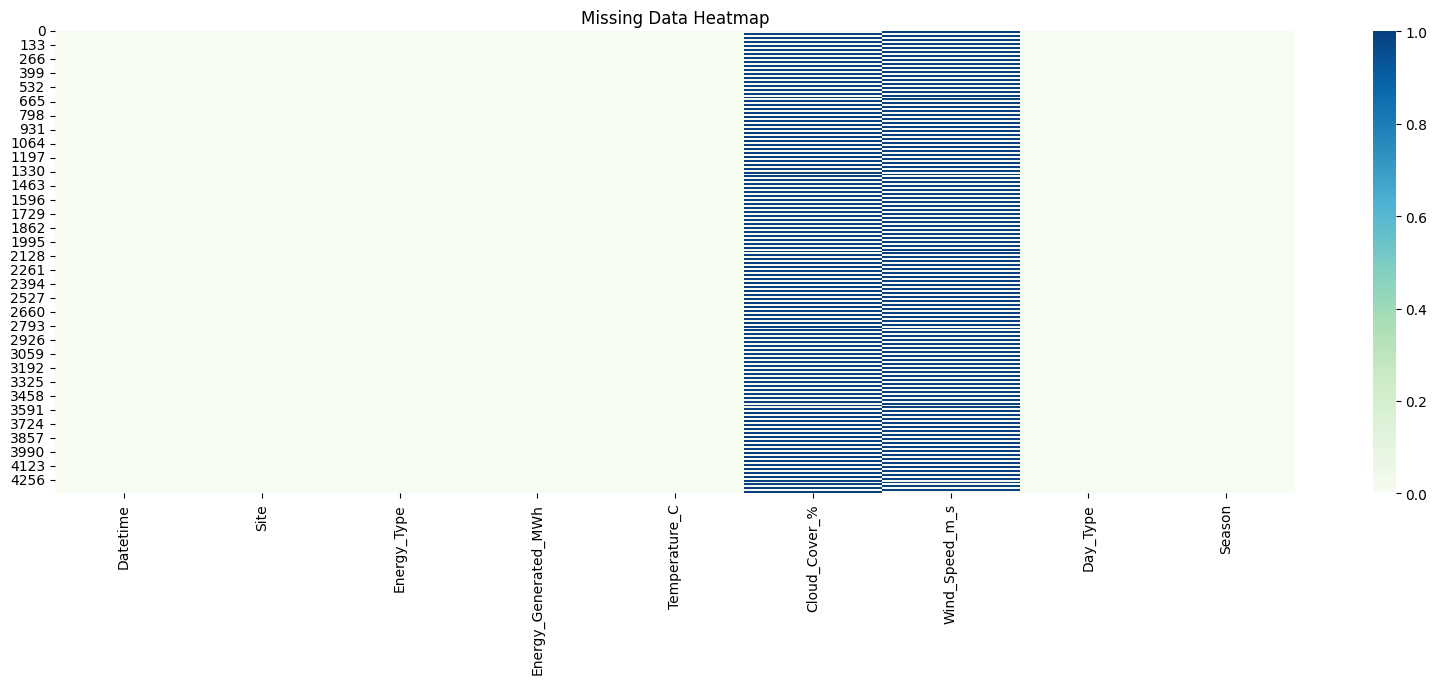

In [14]:
# Check for missing values
print(data.isnull().sum())

# Visualize missing data
plt.figure(figsize=(20,6))
sns.heatmap(data.isnull(), cbar=True, cmap="GnBu")
plt.title('Missing Data Heatmap')
plt.show()

The dataset has 9 columns and 4,386 rows.

Missing values were found in the Cloud cover and Windspeed columns.

Rows related to solar data had values for Cloud cover but missing Windspeed.

Rows related to wind data had values for Windspeed but missing Cloud cover.

Each type of energy system only records the variables relevant to it.

#### Set time as index

To analyze the dataset, we'll set the time column as the index to:

* Simplify time-based operations
* Improve time-series analysis
* Enable clearer and more accurate visualizations



In [15]:
# Set date time as index for dataset
data = data.set_index('Datetime')
data.index = pd.to_datetime(data.index)
data.head()

,Site,Energy_Type,Energy_Generated_MWh,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s,Day_Type,Season
Datetime,,,,,,,,
2023-01-01 16:30:00,Site_A,Solar,28.86,21.57,74.61,NaN,Weekend,Winter
2023-01-01 09:15:00,Site_A,Wind,43.20,4.97,NaN,8.00,Weekend,Winter
2023-01-01 06:00:00,Site_B,Solar,66.99,25.73,20.48,NaN,Weekend,Winter
2023-01-01 17:45:00,Site_B,Wind,67.63,19.10,NaN,12.56,Weekend,Winter
2023-01-01 07:00:00,Site_C,Solar,67.94,27.57,37.11,NaN,Weekend,Winter


In [16]:
# Check for Duplicated rows
print(data.duplicated().sum())

0


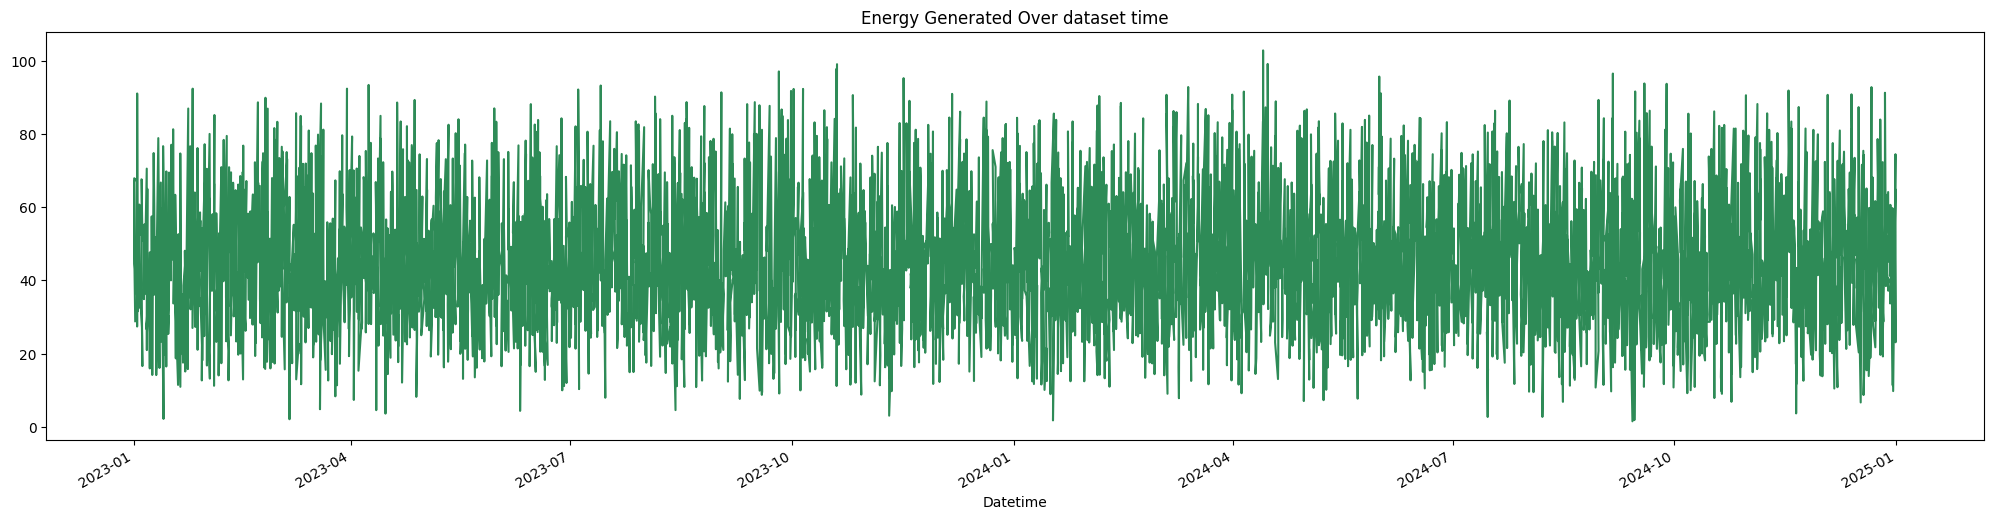

In [17]:
# Plot time series showing enegy generated over time in the data set
data['Energy_Generated_MWh'].plot(figsize=(25,6), title='Energy Generated Over dataset time')
plt.show()

The time series data shows that solar energy consistently generates more energy than wind energy.

#### Univariate Analysis

##### Numerical columns

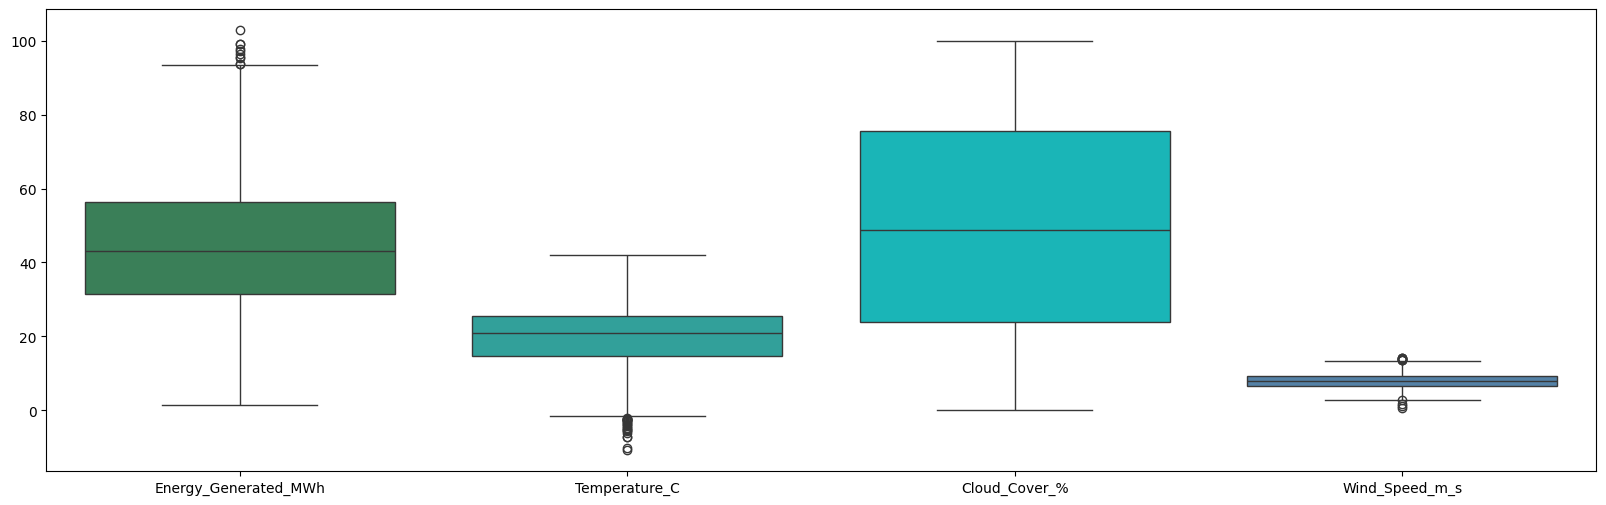

In [18]:
# Visualise box plot of numerical columns
plt.figure(figsize=(20, 6))
sns.boxplot(data=data)
plt.show()

The dataset shows lower outliers in the temperature column, pointing to unusually low temperatures during the recorded period. Energy generated had upper outliers, suggesting spikes in production. Cloud cover showed no outliers, indicating stable readings. Windspeed had outliers on both ends, reflecting periods of both very strong and very weak winds.

##### Categorical columns

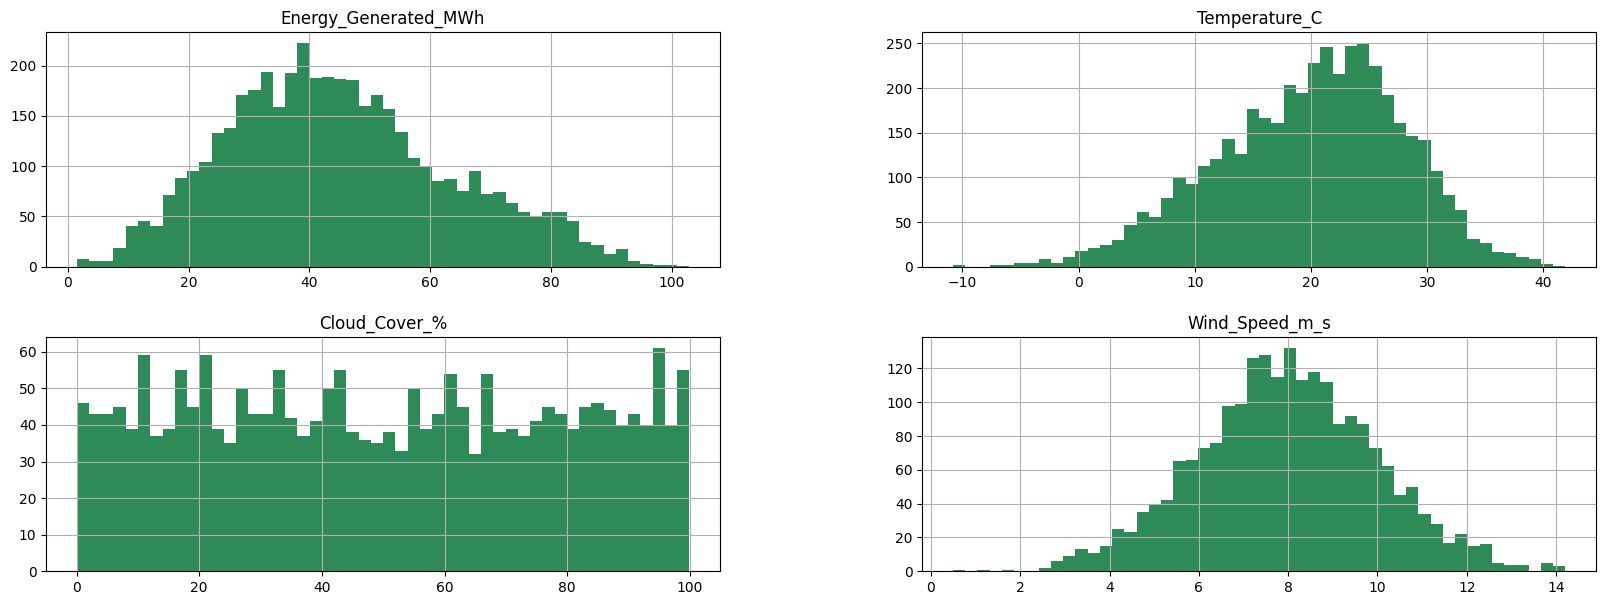

In [30]:
# Check for distribution in numeric columns
data.hist(bins=50, figsize=(20, 7))
plt.show()


The distribution of Energy Generated (MWh) shows a strong peak around 40 MWh, suggesting most values cluster near this point and follow a roughly normal pattern. Temperature also follows a bell-shaped curve, peaking around 20°C, indicating typical weather conditions centered around that value. Wind Speed shows a similar pattern, with most values near 8 m/s, hinting at consistent wind conditions. In contrast, Cloud Cover is widely spread across the full range from 0% to 100%, showing high variability without a clear central value.

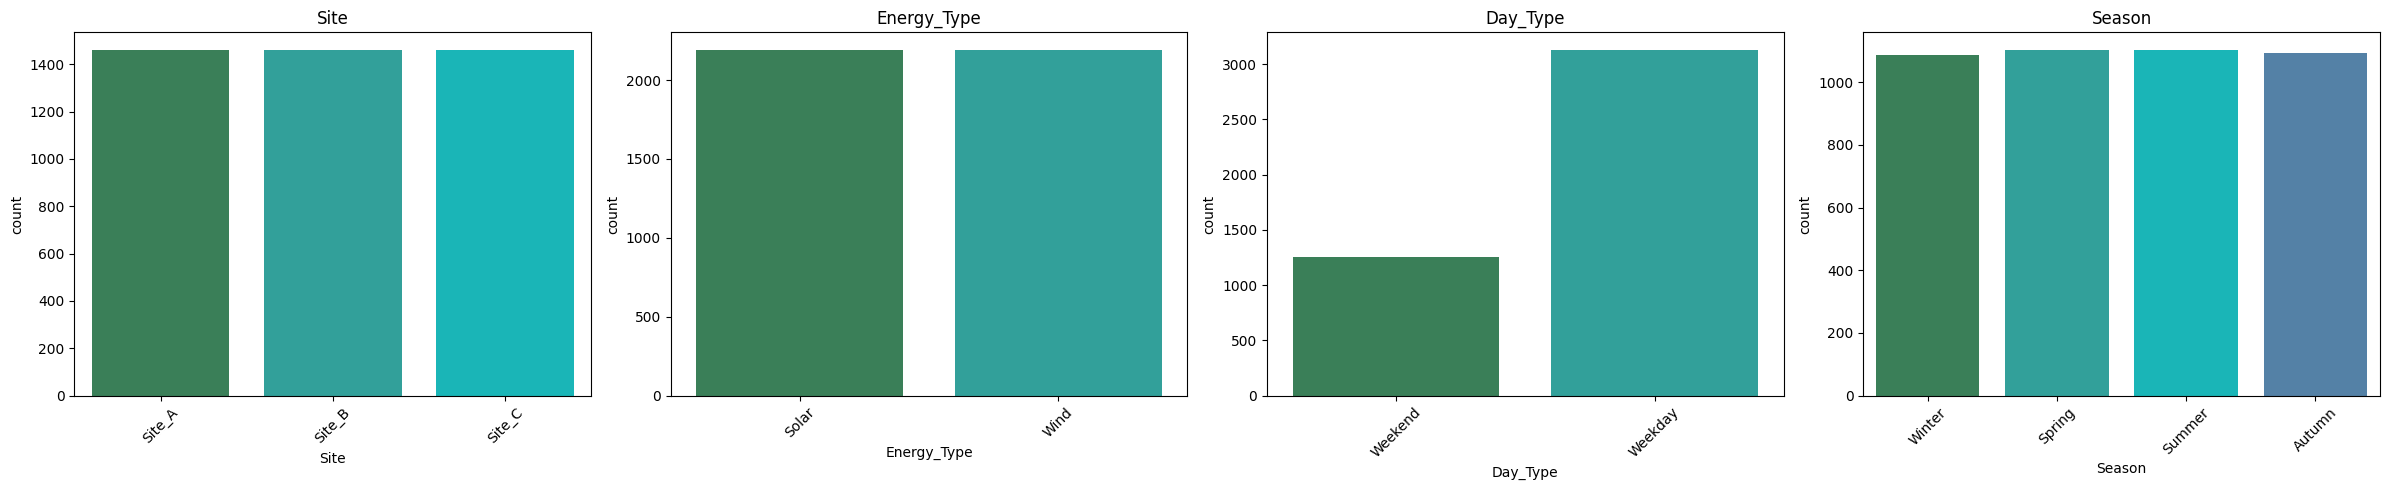

In [28]:
# View count plot for categorical columns
# Get categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# Plot solar categorical features in subplots
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(6 * len(categorical_cols), 5))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i], palette=renewable_colors)
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

The dataset shows an even distribution across the three sites (Site\_A, Site\_B, Site\_C), each with about 1400 entries, and an equal split count between Solar and Wind energy types. Seasonal data is also balanced, with each season (Winter, Spring, Summer, Autumn) having values slightly above 1000 entries each. However, there's a clear skew in Day Type: Weekdays have just above 3000 entries, while Weekends have nearly 1250 entries.


#### Bivariate Analysis

###### Site Vs Energy generated

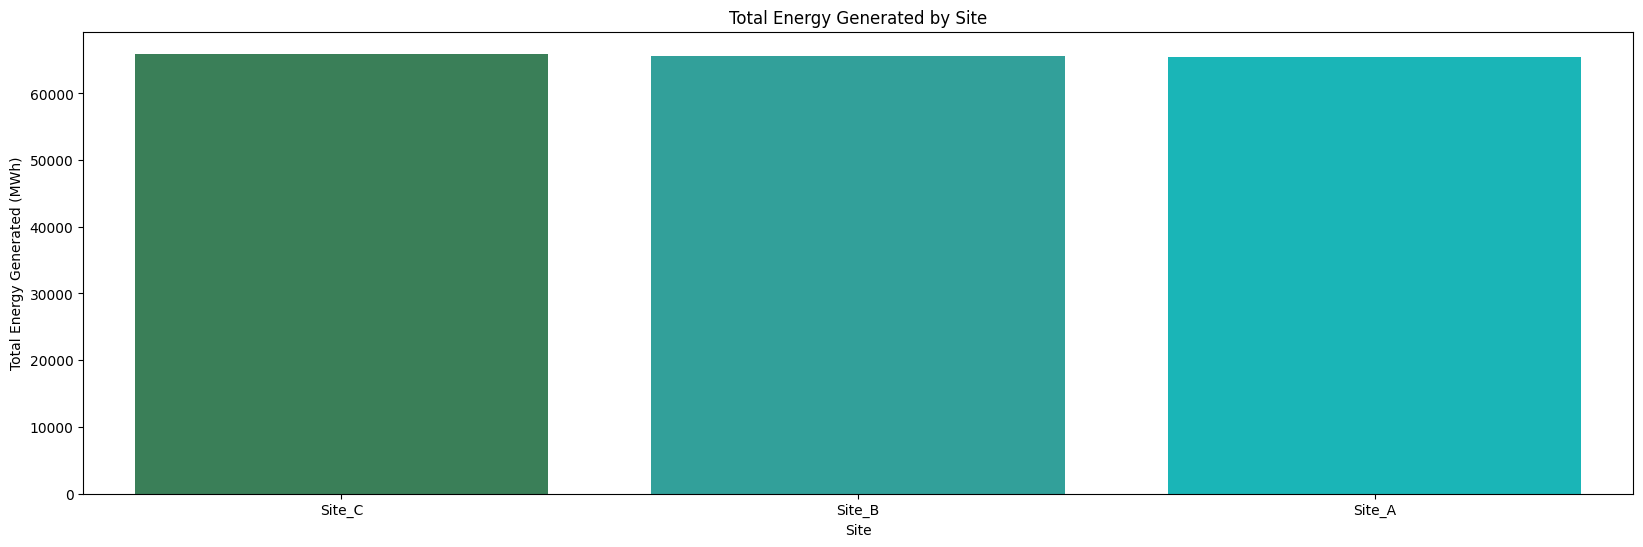

In [31]:
# Site Vs Energy generated for both dataset

plt.figure(figsize=(20, 6))
# Calculate total energy generated by site and reset index to create a DataFrame
site_energy = data.groupby('Site')['Energy_Generated_MWh'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=site_energy, x='Site', y='Energy_Generated_MWh', hue='Site', palette=renewable_colors, legend=False)
plt.title('Total Energy Generated by Site')
plt.xlabel('Site')
plt.ylabel('Total Energy Generated (MWh)')
plt.show()

- Energy Output: Each site has generated approximately 65,000 MWh of energy, showing a near-equal distribution across the three sites.

##### Temperature Vs Energy generated

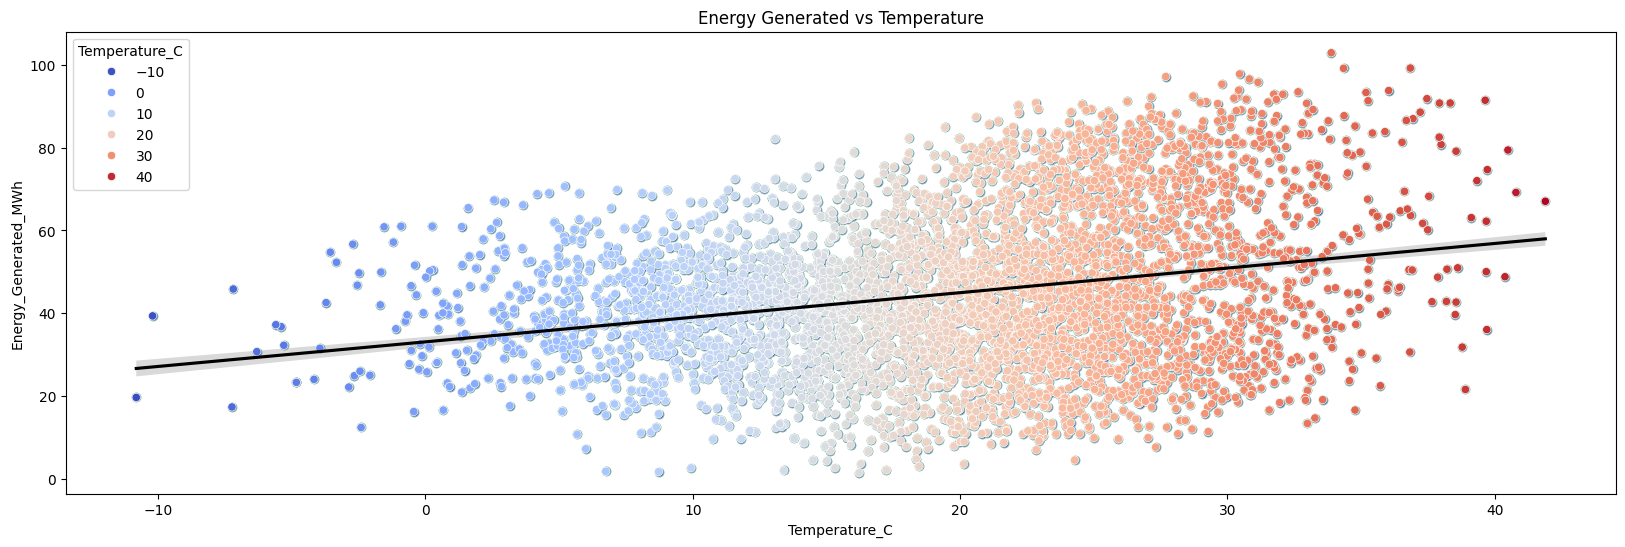

In [32]:
# Plot the amount of energy generated by Temprature over the data frame time period
plt.figure(figsize=(20,6))
data_for_plot = data.reset_index()
sns.regplot(data=data, x='Temperature_C', y='Energy_Generated_MWh', line_kws={'color': 'black'})
sns.scatterplot(data=data, x='Temperature_C', y='Energy_Generated_MWh', color='blue', alpha=0.5)
sns.scatterplot(x='Temperature_C', y='Energy_Generated_MWh', data=data, hue='Temperature_C', palette='coolwarm')
plt.title('Energy Generated vs Temperature')
plt.show()


##### Energy Type Vs Energy generated

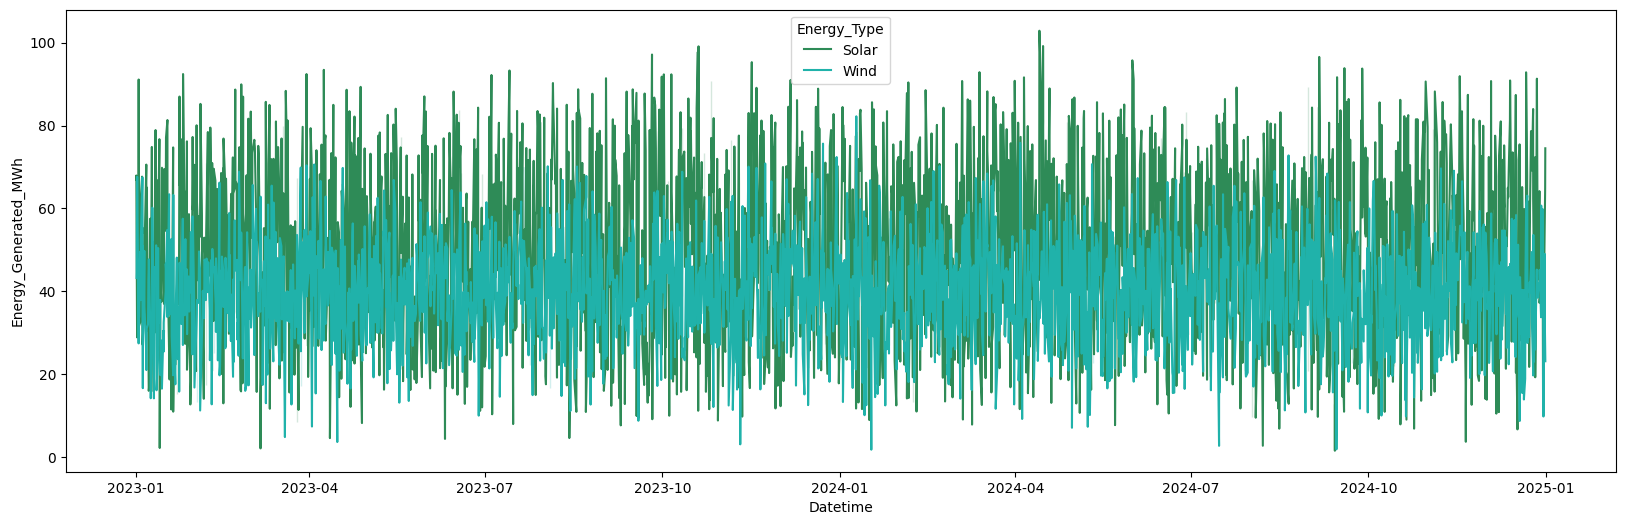

In [33]:
# Plot the amount of energy generated by energy type over the data frame time period
plt.figure(figsize=(20,6))
sns.lineplot(x=data.index, y='Energy_Generated_MWh', hue='Energy_Type', data=data)
plt.show()

Solar energy seemed to generate more energy.

##### Cloud Cover Vs Energy Generated


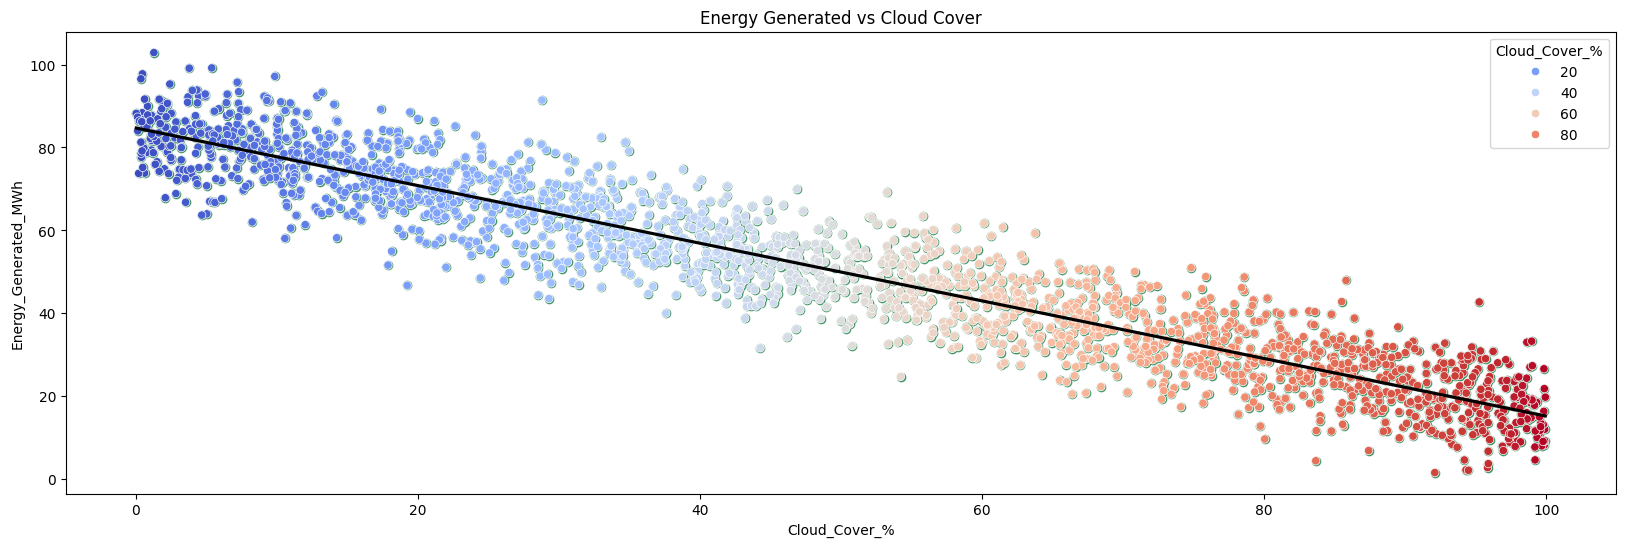

In [34]:
# Plot the amount of energy generated by Cloud Cover over the data frame time period
plt.figure(figsize=(20,6))
data_for_plot = data.reset_index()
sns.regplot(data=data, x='Cloud_Cover_%', y='Energy_Generated_MWh', line_kws={'color': 'black'})
sns.scatterplot(x='Cloud_Cover_%', y='Energy_Generated_MWh', data=data_for_plot, hue='Cloud_Cover_%', palette='coolwarm')
plt.title('Energy Generated vs Cloud Cover')
plt.show()

The plot highlights how solar energy production declines with increased cloud cover, indicating a strong inverse relationship.


##### WindSpeed Vs Energy Generated

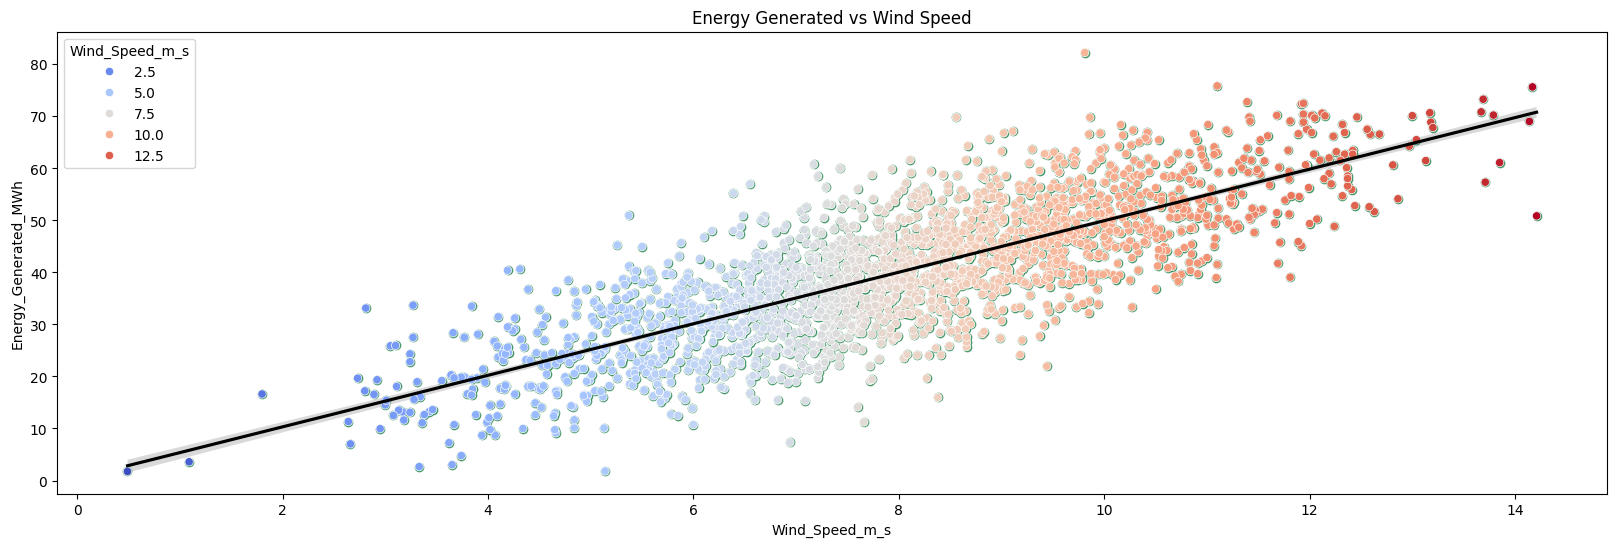

In [35]:
# Plot the amount of energy generated by windspeed.
plt.figure(figsize=(20,6))
data_for_plot = data.reset_index()
sns.regplot(data=data, x='Wind_Speed_m_s', y='Energy_Generated_MWh', line_kws={'color': 'black'})
sns.scatterplot(x='Wind_Speed_m_s', y='Energy_Generated_MWh', data=data_for_plot, hue='Wind_Speed_m_s', palette='coolwarm')
plt.title('Energy Generated vs Wind Speed')
plt.show()

There's a strong upward trend showing that as wind speed increases, energy generation also increases.

The scatter plot for shows a weak positive linear relationship between temperature and energy generated. This means that as temperature increases, energy generation tends to increase slightly, and vice versa in the overall dataset.

##### Day Type Vs Energy Generated

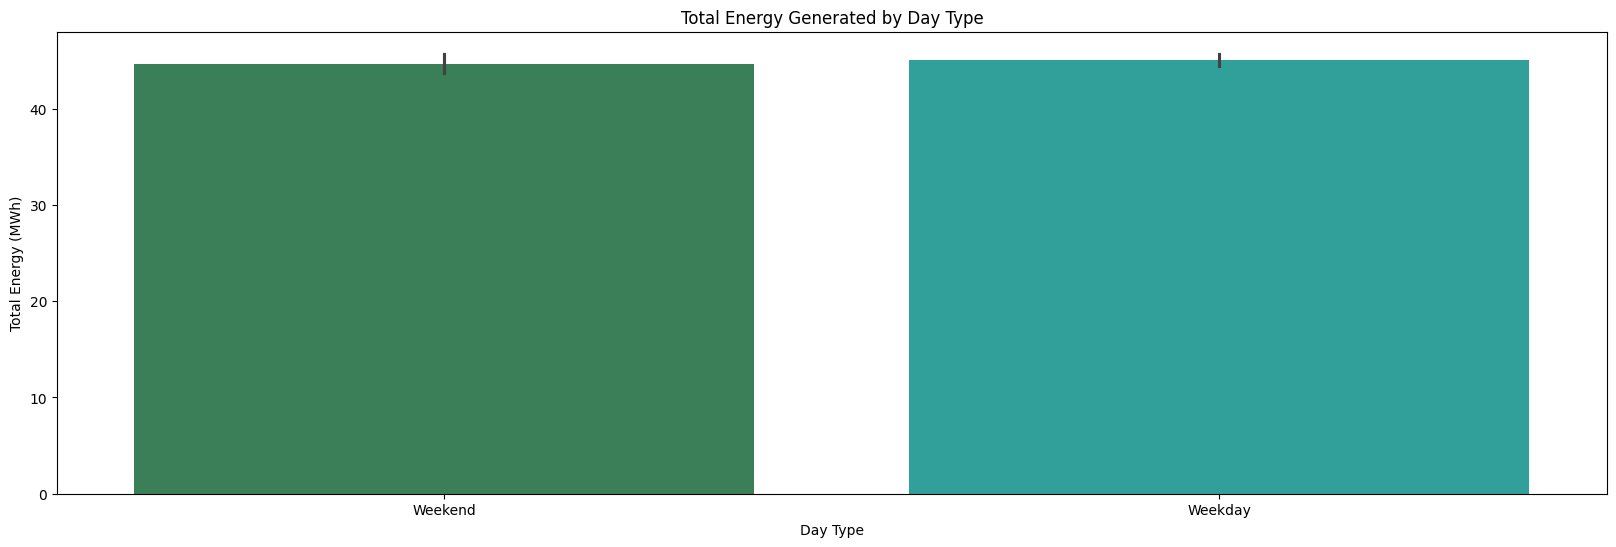

In [36]:
# Visualize Day type Vs Energy Generated
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x='Day_Type', y='Energy_Generated_MWh', hue='Day_Type', palette=renewable_colors, legend=False)
plt.title('Total Energy Generated by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Total Energy (MWh)')
plt.show()

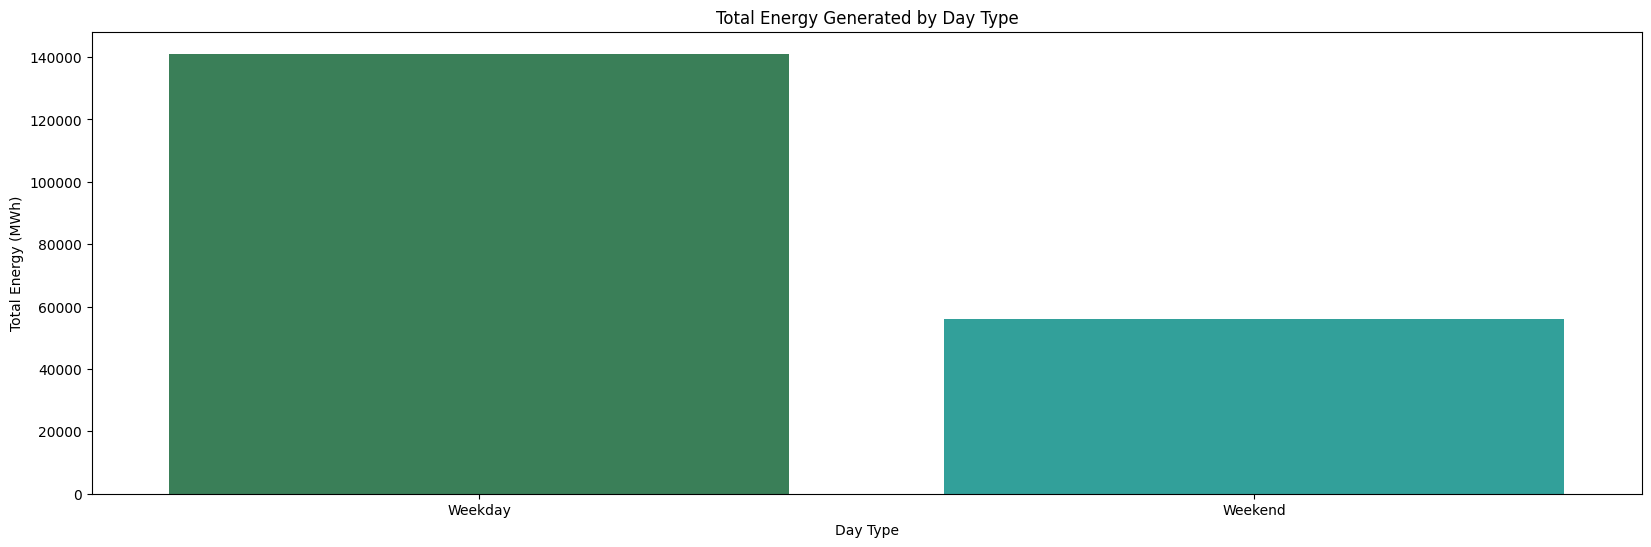

In [37]:
# Group by Day_Type and calculate sum of energy generated
day_energy_sum = data.groupby('Day_Type')['Energy_Generated_MWh'].sum().reset_index()

# Plot the summed energy values with correct hue usage
plt.figure(figsize=(20, 6))
sns.barplot(data=day_energy_sum, x='Day_Type', y='Energy_Generated_MWh', hue='Day_Type', palette=renewable_colors, legend=False)
plt.title('Total Energy Generated by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Total Energy (MWh)')
plt.show()

#### Energy generated vs Season

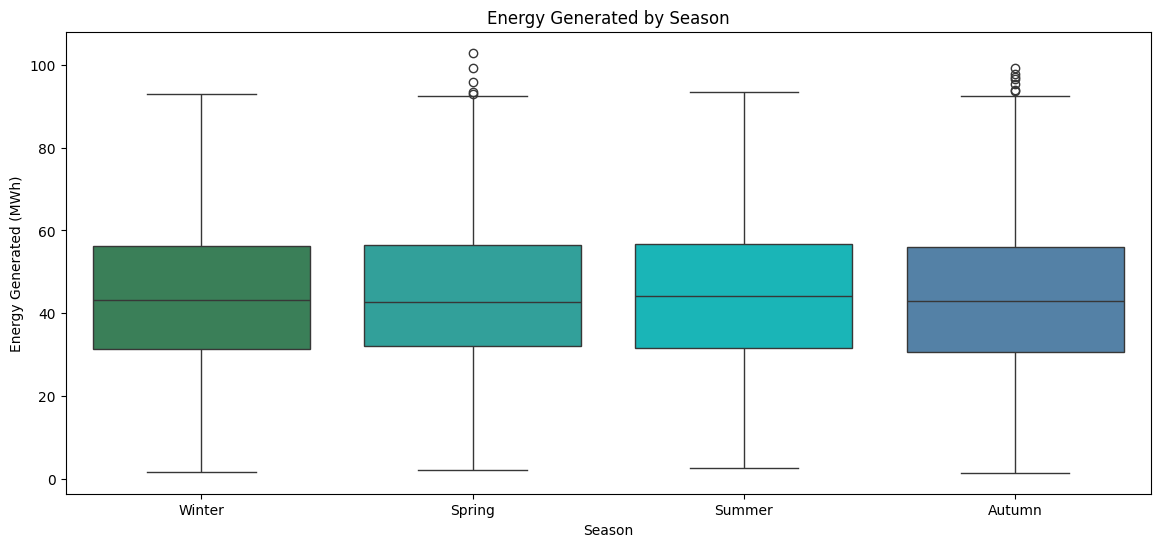

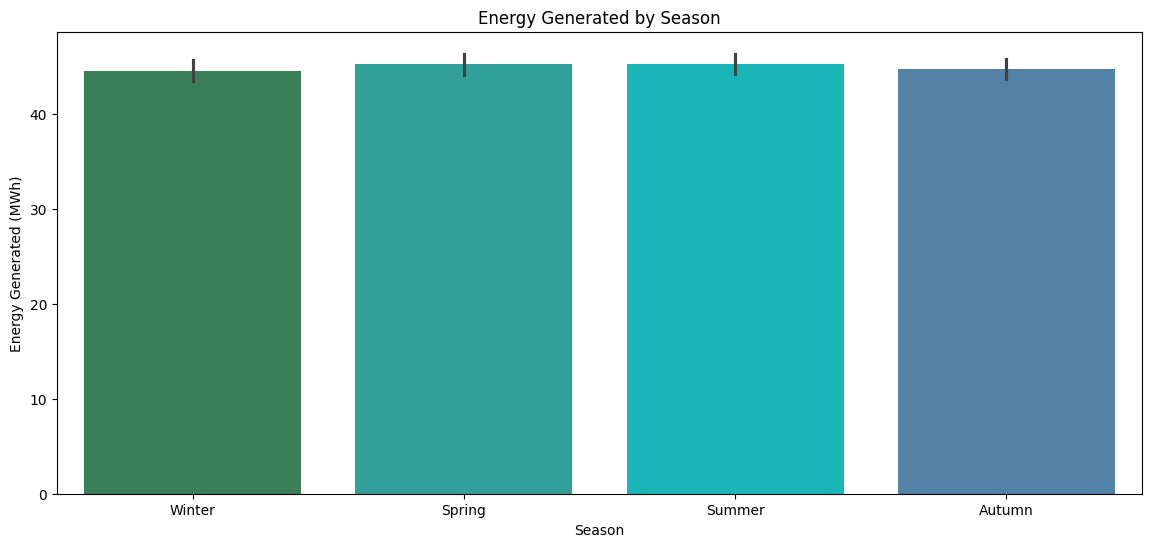

In [39]:
# Visualize energy generated Vs Season
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='Season', y='Energy_Generated_MWh', hue='Season', palette=renewable_colors, legend=False)
plt.title('Energy Generated by Season')
plt.xlabel('Season')
plt.ylabel('Energy Generated (MWh)')
plt.show()


plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Season', y='Energy_Generated_MWh', hue='Season', palette=renewable_colors, legend=False)
plt.title('Energy Generated by Season')
plt.xlabel('Season')
plt.ylabel('Energy Generated (MWh)')
plt.show()


All seasons averaged around 45 MWh of energy generated per day. Spring and autumn, however, showed occasional outliers, pointing to spikes in energy production during those periods.

Energy generation remains consistent across both weekdays and weekends, showing no significant difference between the two.

##### Multivariate Analysis

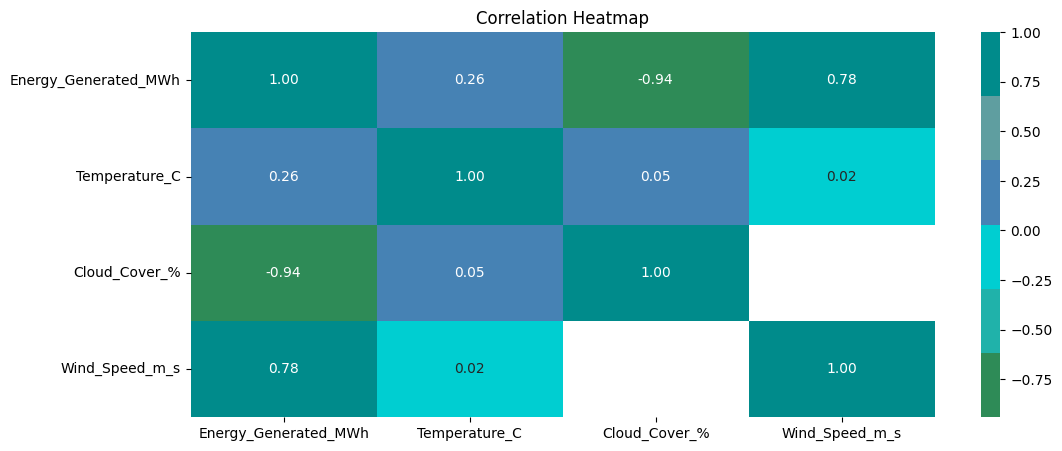

In [40]:
# Regression analysis for numeric columns VS target columns
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap=renewable_colors)
plt.title('Correlation Heatmap')
plt.show()

Energy generation shows a weak positive correlation with temperature, suggesting a slight increase as temperatures rise. Cloud cover has a strong negative correlation, meaning more cloud cover significantly reduces energy output. Wind speed shows a strong positive correlation, indicating that higher wind speeds generally lead to more energy generation.

## Machine Learning

### Perform One-hot encoding all other categorical dataset

In [41]:
# Identify categorical data in the data set
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

print(data.shape)
data.head()

(4386, 15)


,Energy_Generated_MWh,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s,Site_Site_A,Site_Site_B,Site_Site_C,Energy_Type_Solar,Energy_Type_Wind,Day_Type_Weekday,Day_Type_Weekend,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
Datetime,,,,,,,,,,,,,,,
2023-01-01 16:30:00,28.86,21.57,74.61,NaN,True,False,False,True,False,False,True,False,False,False,True
2023-01-01 09:15:00,43.20,4.97,NaN,8.00,True,False,False,False,True,False,True,False,False,False,True
2023-01-01 06:00:00,66.99,25.73,20.48,NaN,False,True,False,True,False,False,True,False,False,False,True
2023-01-01 17:45:00,67.63,19.10,NaN,12.56,False,True,False,False,True,False,True,False,False,False,True
2023-01-01 07:00:00,67.94,27.57,37.11,NaN,False,False,True,True,False,False,True,False,False,False,True


#### Feature Engineering

Because wind energy rows lack cloud cover values, and solar energy rows lack wind speed values, we'll apply feature engineering to handle these missing values. This prevents the model from being misled during training by irrelevant or missing data in each energy type.


In [42]:
# Fill NaNs in Wind_Speed and Cloud_Cover with 0
data['Wind_Speed_m_s'] = data['Wind_Speed_m_s'].fillna(0)
data['Cloud_Cover_%'] = data['Cloud_Cover_%'].fillna(0)
data.head()

,Energy_Generated_MWh,Temperature_C,Cloud_Cover_%,Wind_Speed_m_s,Site_Site_A,Site_Site_B,Site_Site_C,Energy_Type_Solar,Energy_Type_Wind,Day_Type_Weekday,Day_Type_Weekend,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
Datetime,,,,,,,,,,,,,,,
2023-01-01 16:30:00,28.86,21.57,74.61,0.00,True,False,False,True,False,False,True,False,False,False,True
2023-01-01 09:15:00,43.20,4.97,0.00,8.00,True,False,False,False,True,False,True,False,False,False,True
2023-01-01 06:00:00,66.99,25.73,20.48,0.00,False,True,False,True,False,False,True,False,False,False,True
2023-01-01 17:45:00,67.63,19.10,0.00,12.56,False,True,False,False,True,False,True,False,False,False,True
2023-01-01 07:00:00,67.94,27.57,37.11,0.00,False,False,True,True,False,False,True,False,False,False,True


In [43]:
# Step 4: Multiply by binary indicators for Energy_Type_Solar &	Energy_Type_Wind by cloudcover and wind speed
data['Cloud_Cover_%_is_solar_'] = data['Energy_Type_Solar'] * data['Cloud_Cover_%']
data['Wind_Speed_m_s_is_wind'] = data['Energy_Type_Wind'] * data['Wind_Speed_m_s']

# Drop cloud cover and wind speed columns
data.drop(['Cloud_Cover_%', 'Wind_Speed_m_s'], axis=1, inplace=True)

data.head()

,Energy_Generated_MWh,Temperature_C,Site_Site_A,Site_Site_B,Site_Site_C,Energy_Type_Solar,Energy_Type_Wind,Day_Type_Weekday,Day_Type_Weekend,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Cloud_Cover_%_is_solar_,Wind_Speed_m_s_is_wind
Datetime,,,,,,,,,,,,,,,
2023-01-01 16:30:00,28.86,21.57,True,False,False,True,False,False,True,False,False,False,True,74.61,0.00
2023-01-01 09:15:00,43.20,4.97,True,False,False,False,True,False,True,False,False,False,True,0.00,8.00
2023-01-01 06:00:00,66.99,25.73,False,True,False,True,False,False,True,False,False,False,True,20.48,0.00
2023-01-01 17:45:00,67.63,19.10,False,True,False,False,True,False,True,False,False,False,True,0.00,12.56
2023-01-01 07:00:00,67.94,27.57,False,False,True,True,False,False,True,False,False,False,True,37.11,0.00


Now that we've addressed the missing values through feature engineering, we can move on to the machine learning stage.

#### Perform One-Hot Encoding

##### Split the Dataset to train and test set

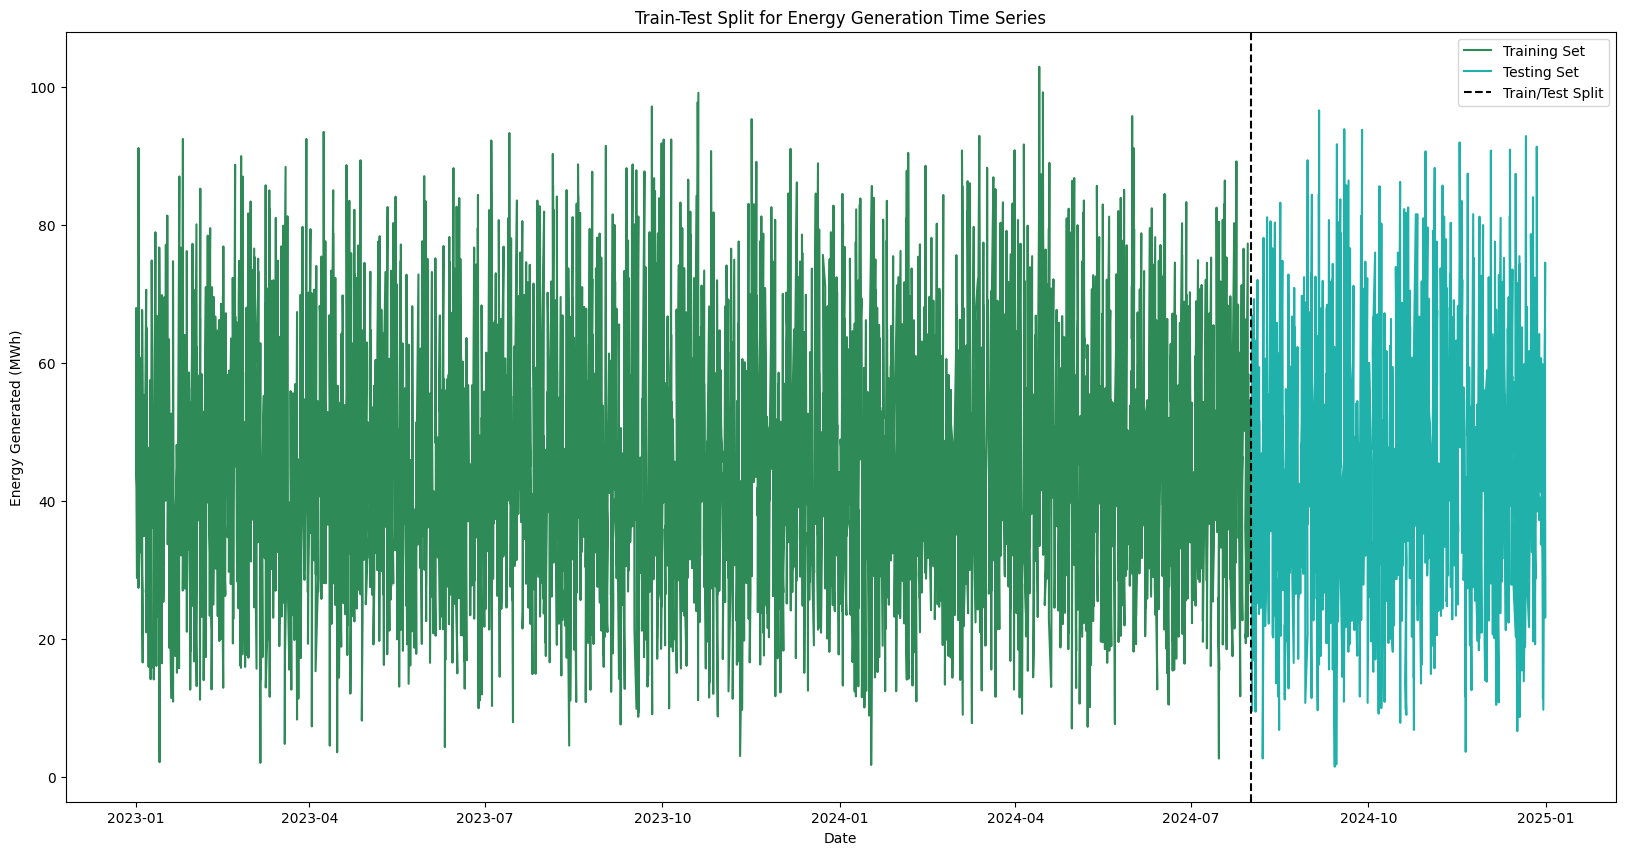

In [46]:
# Split the data
train = data.loc[data.index < '2024-08-01']
test = data.loc[data.index >= '2024-08-01']

# Plot the time series
plt.figure(figsize=(20, 10))
plt.plot(train.index, train['Energy_Generated_MWh'], label='Training Set')
plt.plot(test.index, test['Energy_Generated_MWh'], label='Testing Set', color=renewable_colors[1])
plt.axvline(pd.to_datetime('2024-08-01'), color='black', linestyle='--', label='Train/Test Split')
plt.title('Train-Test Split for Energy Generation Time Series')
plt.xlabel('Date')
plt.ylabel('Energy Generated (MWh)')
plt.legend()
plt.show()

We used the first 19 months of data for training and reserved the last 5 months for testing.

In [47]:
# Further Split Train and Test into X and Y respectively
X_train = train.drop('Energy_Generated_MWh', axis=1)
y_train = train['Energy_Generated_MWh']
X_test = test.drop('Energy_Generated_MWh', axis=1)
y_test = test['Energy_Generated_MWh']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3468, 14) (3468,) (918, 14) (918,)


#### Standardize the data Using Standard Scaler

In [48]:
# Standardize the dataset using Standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(3468, 14) (3468,) (918, 14) (918,)


#### Machine Learning

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, BayesianRidge
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.preprocessing import PolynomialFeatures

# Instantiate the models
linear_model = LinearRegression()
# Logistic Regression (for regression, not ideal — removed or commented out for clarity)
# logistic_model = LogisticRegression()

poly = PolynomialFeatures(degree=2) # Example degree, adjust as needed
poly_model = LinearRegression() # Polynomial Regression uses LinearRegression on polynomial features
lasso_model = Lasso()
# Quantile Regression is instantiated directly before fitting
bayesian_model = BayesianRidge()
pca = PCA() # Example n_components, adjust as needed
pcr_model = LinearRegression() # PCR uses LinearRegression on PCA components
pls_model = PLSRegression() # Example n_components, adjust as needed
svr_model = SVR()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()


# Linear Regression
linear_model.fit(X_train_scaled, y_train)
linear_preds = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, linear_preds)

# Logistic Regression (Removed as it's not suitable for continuous regression)

# Polynomial Regression
# Ensure X_train_scaled and X_test_scaled are suitable for PolynomialFeatures
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
# Corrected variable name for fitting
poly_model.fit(X_train_poly, y_train)
poly_preds = poly_model.predict(X_test_scaled_poly)
mse_poly = mean_squared_error(y_test, poly_preds)

# Lasso Regression
lasso_model.fit(X_train_scaled, y_train)
lasso_preds = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, lasso_preds)

# Quantile Regression (requires instantiation and fitting, e.g., QuantReg(y_train, X_train_scaled).fit(q=0.5))
# quant_model = QuantReg(y_train, X_train_scaled)
# quant_results = quant_model.fit(q=0.5) # Fit for median
# quant_preds = quant_results.predict(X_test_scaled)
# mse_quant = mean_squared_error(y_test, quant_preds)


# Bayesian Ridge Regression
bayesian_model.fit(X_train_scaled, y_train)
bayesian_preds = bayesian_model.predict(X_test_scaled)
mse_bayesian = mean_squared_error(y_test, bayesian_preds)

# Principal Components Regression
# Ensure pca is instantiated with appropriate n_components
# It is recommended to choose n_components based on explained variance.
# For demonstration, using a placeholder.
# pca = PCA(n_components=0.95) # e.g., retain 95% variance
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
pcr_model.fit(X_train_scaled_pca, y_train)
pcr_preds = pcr_model.predict(X_test_scaled_pca)
mse_pcr = mean_squared_error(y_test, pcr_preds)

# Partial Least Squares Regression
# Ensure pls_model is instantiated with appropriate n_components
# pls_model = PLSRegression(n_components=2) # e.g., 2 components
pls_model.fit(X_train_scaled, y_train)
pls_preds = pls_model.predict(X_test_scaled)
# PLSRegression predict returns a 2D array, need to flatten for mse
mse_pls = mean_squared_error(y_test, pls_preds.flatten())

# Support Vector Regression
svr_model.fit(X_train_scaled, y_train)
svr_preds = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, svr_preds)

# Decision Tree Regression
tree_model.fit(X_train_scaled, y_train)
tree_preds = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, tree_preds)

# Random Forest Regression
forest_model.fit(X_train_scaled, y_train)
forest_preds = forest_model.predict(X_test_scaled)
mse_forest = mean_squared_error(y_test, forest_preds)

# XGBoost Regression
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, xgb_preds)

# Print all MSEs
print("Mean Squared Errors:")
print(f"Linear Regression: {mse_linear}")
# print(f"Logistic Regression: {mse_logistic}") # Excluded
print(f"Polynomial Regression: {mse_poly}")
print(f"Lasso Regression: {mse_lasso}")
# print(f"Quantile Regression: {mse_quant}") # Uncomment if Quantile Regression is used
print(f"Bayesian Ridge Regression: {mse_bayesian}")
print(f"Principal Components Regression: {mse_pcr}")
print(f"Partial Least Squares Regression: {mse_pls}")
print(f"Support Vector Regression: {mse_svr}")
print(f"Decision Tree Regression: {mse_tree}")
print(f"Random Forest Regression: {mse_forest}")
print(f"XGBoost Regression: {mse_xgb}")

Mean Squared Errors:
Linear Regression: 55.26237426235315
Polynomial Regression: 46.34042598094845
Lasso Regression: 101.40184972378074
Bayesian Ridge Regression: 55.274818733850324
Principal Components Regression: 55.26237426235314
Partial Least Squares Regression: 122.81435327188954
Support Vector Regression: 82.18149747921672
Decision Tree Regression: 88.40920577342048
Random Forest Regression: 53.127507666346105
XGBoost Regression: 56.58761250845918


The models show different accuracy levels in predicting energy generated, based on their mean squared error (MSE).

Polynomial Regression performs best, with the lowest MSE of 46.34. This means it captures the data’s complex patterns better by using non-linear relationships. Partial Least Squares Regression has the highest error (122.81), making it the least reliable here.

Random Forest (MSE 53.13) and Linear Regression (MSE 55.26) also do well but don’t match Polynomial Regression’s accuracy.

Polynomial Regression model is advised to be used for prediction.

##### Forecast Based on the Top 3 Models

In [66]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assign predictions to test DataFrame
test['pred_linear'] = linear_preds
test['pred_poly'] = poly_preds
test['pred_forest'] = forest_preds

# Define top 3 models and visual config
models = ['pred_linear', 'pred_poly', 'pred_forest']
titles = ['Linear Regression', 'Polynomial Regression', 'Random Forest']
colors = ['#2E8B57', '#20B2AA', '#5F9EA0']
actual_col = 'Energy_Generated_MWh'

# Create subplot grid
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=titles,
    vertical_spacing=0.08
)

# Add prediction and actual traces
for i, (model, color) in enumerate(zip(models, colors)):
    row = i + 1

    # Actual
    fig.add_trace(
        go.Scatter(
            x=test.index,
            y=test[actual_col],
            mode='lines',
            name='Actual',
            line=dict(color='#2F4F4F', width=2),
            showlegend=(i == 0)
        ),
        row=row, col=1
    )

    # Prediction
    fig.add_trace(
        go.Scatter(
            x=test.index,
            y=test[model],
            mode='lines',
            name=model.replace('pred_', '').replace('_', ' ').title(),
            line=dict(color=color, width=2),
            showlegend=(i == 0)
        ),
        row=row, col=1
    )

# Layout and axis styling
fig.update_layout(
    height=1400,
    width=1500,
    title='Renewable Energy Forecasting: Predictions vs Actual (Top 3 Models)',
    title_font=dict(size=18, color='#2E8B57'),
    showlegend=True,
    paper_bgcolor='#F8FFF8',
    plot_bgcolor='white',
    font=dict(color='#2F4F4F')
)

for i in range(1, 4):
    fig.update_xaxes(
        title_text='Time Index',
        row=i, col=1,
        title_font=dict(color='#2E8B57'),
        gridcolor='#E0F2E0'
    )
    fig.update_yaxes(
        title_text='Energy (MWh)',
        row=i, col=1,
        title_font=dict(color='#2E8B57'),
        gridcolor='#E0F2E0'
    )

fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>Time: %{x}<br>Energy: %{y:.2f} MWh<extra></extra>'
)

fig.show()

#### Feature Importance across models

#### Feature Importance based on Top 3 models

In [64]:
def extract_feature_importance(models_dict, X_test_scaled, y_test, feature_names):
    """
    Extract and normalize feature importance from models.
    """
    importance_results = {}

    def normalize(values):
        total = np.sum(values)
        return (values / total * 100) if total > 0 else values

    def get_coefs(model):
        return np.abs(model.coef_)

    # Coefficient-based models
    coef_models = {
        'Linear Regression': get_coefs,
        'Lasso': get_coefs,
        'Bayesian Ridge': get_coefs
    }

    for name, get_func in coef_models.items():
        if name in models_dict:
            coefs = get_func(models_dict[name])
            importance_results[name] = {
                'features': feature_names,
                'importance': normalize(coefs),
                'method': 'Coefficient Magnitude'
            }

    # Tree-based models
    tree_models = {
        'Random Forest': 'Built-in Feature Importance',
        'Decision Tree': 'Built-in Feature Importance',
        'XGBoost': 'Gain-based Importance'
    }

    for name, method in tree_models.items():
        if name in models_dict:
            model = models_dict[name]
            importance_results[name] = {
                'features': feature_names,
                'importance': normalize(model.feature_importances_),
                'method': method
            }

    # Permutation-based models
    perm_models = {
        'SVR': (X_test_scaled, models_dict.get('SVR'), 'Permutation Importance'),
        'PLS': (X_test_scaled, models_dict.get('PLS'), 'Permutation Importance'),
        'Polynomial': (models_dict.get('X_test_poly'), models_dict.get('Polynomial'), 'Poly-mapped Permutation'),
        'PCR': (models_dict.get('X_test_pca'), models_dict.get('PCR'), 'PCA-mapped Permutation')
    }

    for name, (X_input, model, method) in perm_models.items():
        if model is None:
            continue
        print(f"Computing permutation importance for {name}...")
        perm = permutation_importance(model, X_input, y_test, n_repeats=3, random_state=42, n_jobs=-1)
        if name == 'PCR':
            components = models_dict['pca_model'].components_[:len(perm.importances_mean)]
            mapped = np.abs(components.T @ perm.importances_mean)
            importance = normalize(mapped)
        else:
            imp_mean = perm.importances_mean[:len(feature_names)]
            importance = normalize(imp_mean)

        result = {
            'features': feature_names,
            'importance': importance,
            'method': method
        }

        if hasattr(perm, 'importances_std'):
            result['std'] = perm.importances_std

        importance_results[name] = result

    return importance_results


def plot_top_3_feature_importance(importance_results, top_n=10):
    """
    Plot feature importance for the top 3 models.
    """
    top_models = sorted(
        importance_results.items(),
        key=lambda x: np.sum(x[1]['importance']),
        reverse=True
    )[:3]

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    colors = renewable_palette[:3]

    for ax, (model_name, result), color in zip(axes, top_models, colors):
        df = pd.DataFrame({
            'Feature': result['features'],
            'Importance': result['importance']
        }).sort_values('Importance', ascending=True).tail(top_n)

        bars = ax.barh(df['Feature'], df['Importance'], color=color, alpha=0.8)
        ax.set_title(f'{model_name}\n({result["method"]})', fontsize=12, color='#2E8B57', fontweight='bold')
        ax.set_xlabel('Importance (%)', color='#2E8B57')

        if 'std' in result:
            std_values = [result['std'][result['features'].index(f)] for f in df['Feature']]
            ax.errorbar(df['Importance'], range(len(df)), xerr=std_values, fmt='none',
                        ecolor='#8B4513', capsize=4)

        ax.grid(True, alpha=0.3, color='#90EE90')
        ax.set_facecolor('#F8FFF8')

        for bar, val in zip(bars, df['Importance']):
            ax.text(val + 0.5, bar.get_y() + bar.get_height() / 2, f'{val:.1f}%', va='center', fontsize=9)

    plt.tight_layout()
    fig.patch.set_facecolor('#F0FFF0')
    plt.suptitle('Top 3 Models - Feature Importance (%)', fontsize=16, y=1.05, color='#2E8B57', fontweight='bold')
    plt.show()

Computing permutation importance for SVR...


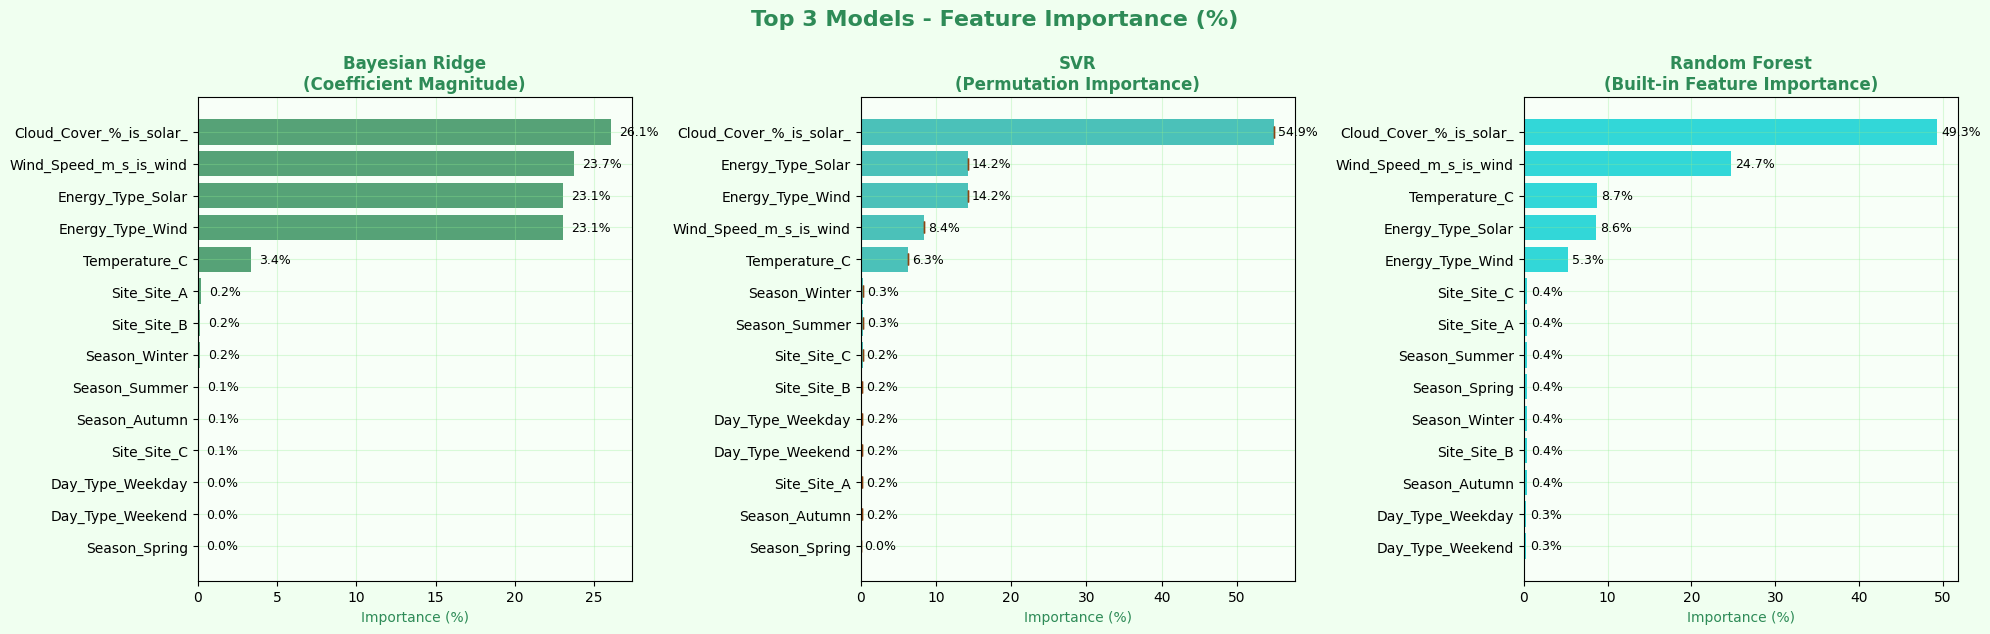

In [65]:
# Extract importance
importance_results = extract_feature_importance(models_dict, X_test_scaled, y_test, feature_names)

# Plot only top 3 models
plot_top_3_feature_importance(importance_results, top_n=15)

Among the top three models, Cloud Cover is the most significant feature, particularly in SVR and Random Forest.  In Bayesian Ridge and Random Forest, wind speed is crucial, but in SVR, it has less of an effect.  While it has less of an impact in Random Forest, the Energy Type (Wind or Solar) makes a substantial contribution to forecasts in both Bayesian Ridge and SVR.  In every model, temperature has a mild impact that varies slightly.  Seasonal and site-based characteristics, on the other hand, provide minimal contributions, indicating that overall environmental factors influence forecasts more than particular regions or times of year.